## Dataset

## Objective/Business Solution

- Build a system that can predict if a Thyroid Cancer survivor can relapse(his or her cancer reoccurs)
- Predict if a patient has reoccurs cancer after treatment (binary classification: Yes or No).
- Explore the data to understand key features to figure out an approach.

## Importing the libraries

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib

pd.set_option('display.max_columns', None)

## Loading the data

In [71]:
df = pd.read_csv('dataset.csv')

In [72]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [73]:
df.columns = df.columns.str.lower()

In [74]:
df = df.rename(columns={'hx smoking': 'hx_smoking', 'hx radiothreapy': 'hx_radiothreapy', 'thyroid function': 'thyroid_function', 'physical examination':'physical_examination'})
df

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


## Data Cleaning

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking               383 non-null    object
 3   hx_smoking            383 non-null    object
 4   hx_radiothreapy       383 non-null    object
 5   thyroid_function      383 non-null    object
 6   physical_examination  383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk                  383 non-null    object
 11  t                     383 non-null    object
 12  n                     383 non-null    object
 13  m                     383 non-null    object
 14  stage                 383 non-null    object
 15  response              383 non-null    ob

In [76]:
df.isnull().sum()

age                     0
gender                  0
smoking                 0
hx_smoking              0
hx_radiothreapy         0
thyroid_function        0
physical_examination    0
adenopathy              0
pathology               0
focality                0
risk                    0
t                       0
n                       0
m                       0
stage                   0
response                0
recurred                0
dtype: int64

In [77]:
df.duplicated().sum()

19

In [78]:
df.drop_duplicates(inplace=True)

#### After the above processes, we can say there is no null or duplicated values present in the data

In [79]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,364.0,NaN,NaN,NaN,41.25,15.31436,15.0,30.0,38.0,52.0,82.0
gender,364,2,F,293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoking,364,2,No,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hx_smoking,364,2,No,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hx_radiothreapy,364,2,No,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thyroid_function,364,5,Euthyroid,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
physical_examination,364,5,Multinodular goiter,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adenopathy,364,6,No,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathology,364,4,Papillary,271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
focality,364,2,Uni-Focal,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [82]:
df.head()

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [83]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f'Unique values in column "{col}": {unique_values}')

Unique values in column "age": [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Unique values in column "gender": ['F' 'M']
Unique values in column "smoking": ['No' 'Yes']
Unique values in column "hx_smoking": ['No' 'Yes']
Unique values in column "hx_radiothreapy": ['No' 'Yes']
Unique values in column "thyroid_function": ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Unique values in column "physical_examination": ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Unique values in column "adenopathy": ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Unique values in column "pathology": ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Unique values in column "focality": ['Uni-Focal' '

In [284]:
cleaned_df = df.copy()

In [285]:
cleaned_df

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [286]:
binary_mappings = {
    'gender': {'M': 1, 'F': 0},
    'smoking': {'Yes': 1, 'No': 0},
    'hx_smoking': {'Yes': 1, 'No': 0},
    'hx_radiothreapy': {'Yes': 1, 'No': 0},
    "recurred": {'Yes': 1, 'No': 0}
}

In [287]:
for col, mapping in binary_mappings.items():
    cleaned_df[col] = cleaned_df[col].map(mapping)

In [288]:
cleaned_df

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,1
379,81,1,1,0,1,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1
380,72,1,1,1,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1
381,61,1,1,1,1,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,1


In [289]:
ordinal_mappings = {
    'thyroid_function': ['Euthyroid', 'Subclinical Hypothyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Clinical Hyperthyroidism'],
    'focality': ['Uni-Focal', 'Multi-Focal'],
    'risk': ['Low', 'Intermediate', 'High'],
    't': ['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'],
    'n': ['N0', 'N1a', 'N1b'],
    'm': ['M0', 'M1'],
    'stage': ['I', 'II', 'III', 'IVA', 'IVB']
}

In [290]:
for column, categories in ordinal_mappings.items():
    encoder = OrdinalEncoder(categories=[categories])
    cleaned_df[column] = encoder.fit_transform(cleaned_df[[column]])
    cleaned_df[column] = cleaned_df[column].astype(np.int8)

In [291]:
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,0,0,0,0,0,Single nodular goiter-left,No,Micropapillary,0,0,0,0,0,0,Indeterminate,0
1,34,0,0,1,0,0,Multinodular goiter,No,Micropapillary,0,0,0,0,0,0,Excellent,0
2,30,0,0,0,0,0,Single nodular goiter-right,No,Micropapillary,0,0,0,0,0,0,Excellent,0
3,62,0,0,0,0,0,Single nodular goiter-right,No,Micropapillary,0,0,0,0,0,0,Excellent,0
4,62,0,0,0,0,0,Multinodular goiter,No,Micropapillary,1,0,0,0,0,0,Excellent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,1,1,1,1,0,Single nodular goiter-right,Right,Papillary,0,2,6,2,1,4,Biochemical Incomplete,1
360,81,1,1,0,1,0,Multinodular goiter,Extensive,Papillary,1,2,6,2,1,4,Structural Incomplete,1
361,72,1,1,1,0,0,Multinodular goiter,Bilateral,Papillary,1,2,6,2,1,4,Structural Incomplete,1
362,61,1,1,1,1,4,Multinodular goiter,Extensive,Hurthel cell,1,2,6,2,0,3,Structural Incomplete,1


In [280]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
cols_to_encode = ['physical_examination', 'adenopathy', 'pathology', 'response']
# print("Columns to encode:", cleaned_df[cols_to_encode].head())
encoded_features = ohe.fit_transform(cleaned_df[cols_to_encode])
# print(encoded_features)
df_encoded = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(cols_to_encode))
# print(df_encoded)

In [127]:
df_encoded = df_encoded.astype('int8')

df_new = pd.concat([cleaned_df, df_encoded], axis=1)
df_new.drop(cols_to_encode, axis=1, inplace=True)
df_new

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,focality,risk,t,n,m,stage,recurred,physical_examination_Multinodular goiter,physical_examination_Normal,physical_examination_Single nodular goiter-left,physical_examination_Single nodular goiter-right,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary,response_Excellent,response_Indeterminate,response_Structural Incomplete
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,34,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,62,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,1,1,1,1,0,0,2,6,2,1,4,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
360,81,1,1,0,1,0,1,2,6,2,1,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
361,72,1,1,1,0,0,1,2,6,2,1,4,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
362,61,1,1,1,1,4,1,2,6,2,0,3,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [130]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   age                                               364 non-null    int64
 1   gender                                            364 non-null    int64
 2   smoking                                           364 non-null    int64
 3   hx_smoking                                        364 non-null    int64
 4   hx_radiothreapy                                   364 non-null    int64
 5   thyroid_function                                  364 non-null    int8 
 6   focality                                          364 non-null    int8 
 7   risk                                              364 non-null    int8 
 8   t                                                 364 non-null    int8 
 9   n                                          

In [131]:
col_to_move = 'recurred'
col = df_new.pop(col_to_move)
df_new[col_to_move] = col

In [132]:
df_new.head()

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,focality,risk,t,n,m,stage,physical_examination_Multinodular goiter,physical_examination_Normal,physical_examination_Single nodular goiter-left,physical_examination_Single nodular goiter-right,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary,response_Excellent,response_Indeterminate,response_Structural Incomplete,recurred
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1,34,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
3,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
4,62,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [153]:
df_new.adenopathy_No.value_counts()

adenopathy_No
1    258
0    106
Name: count, dtype: int64

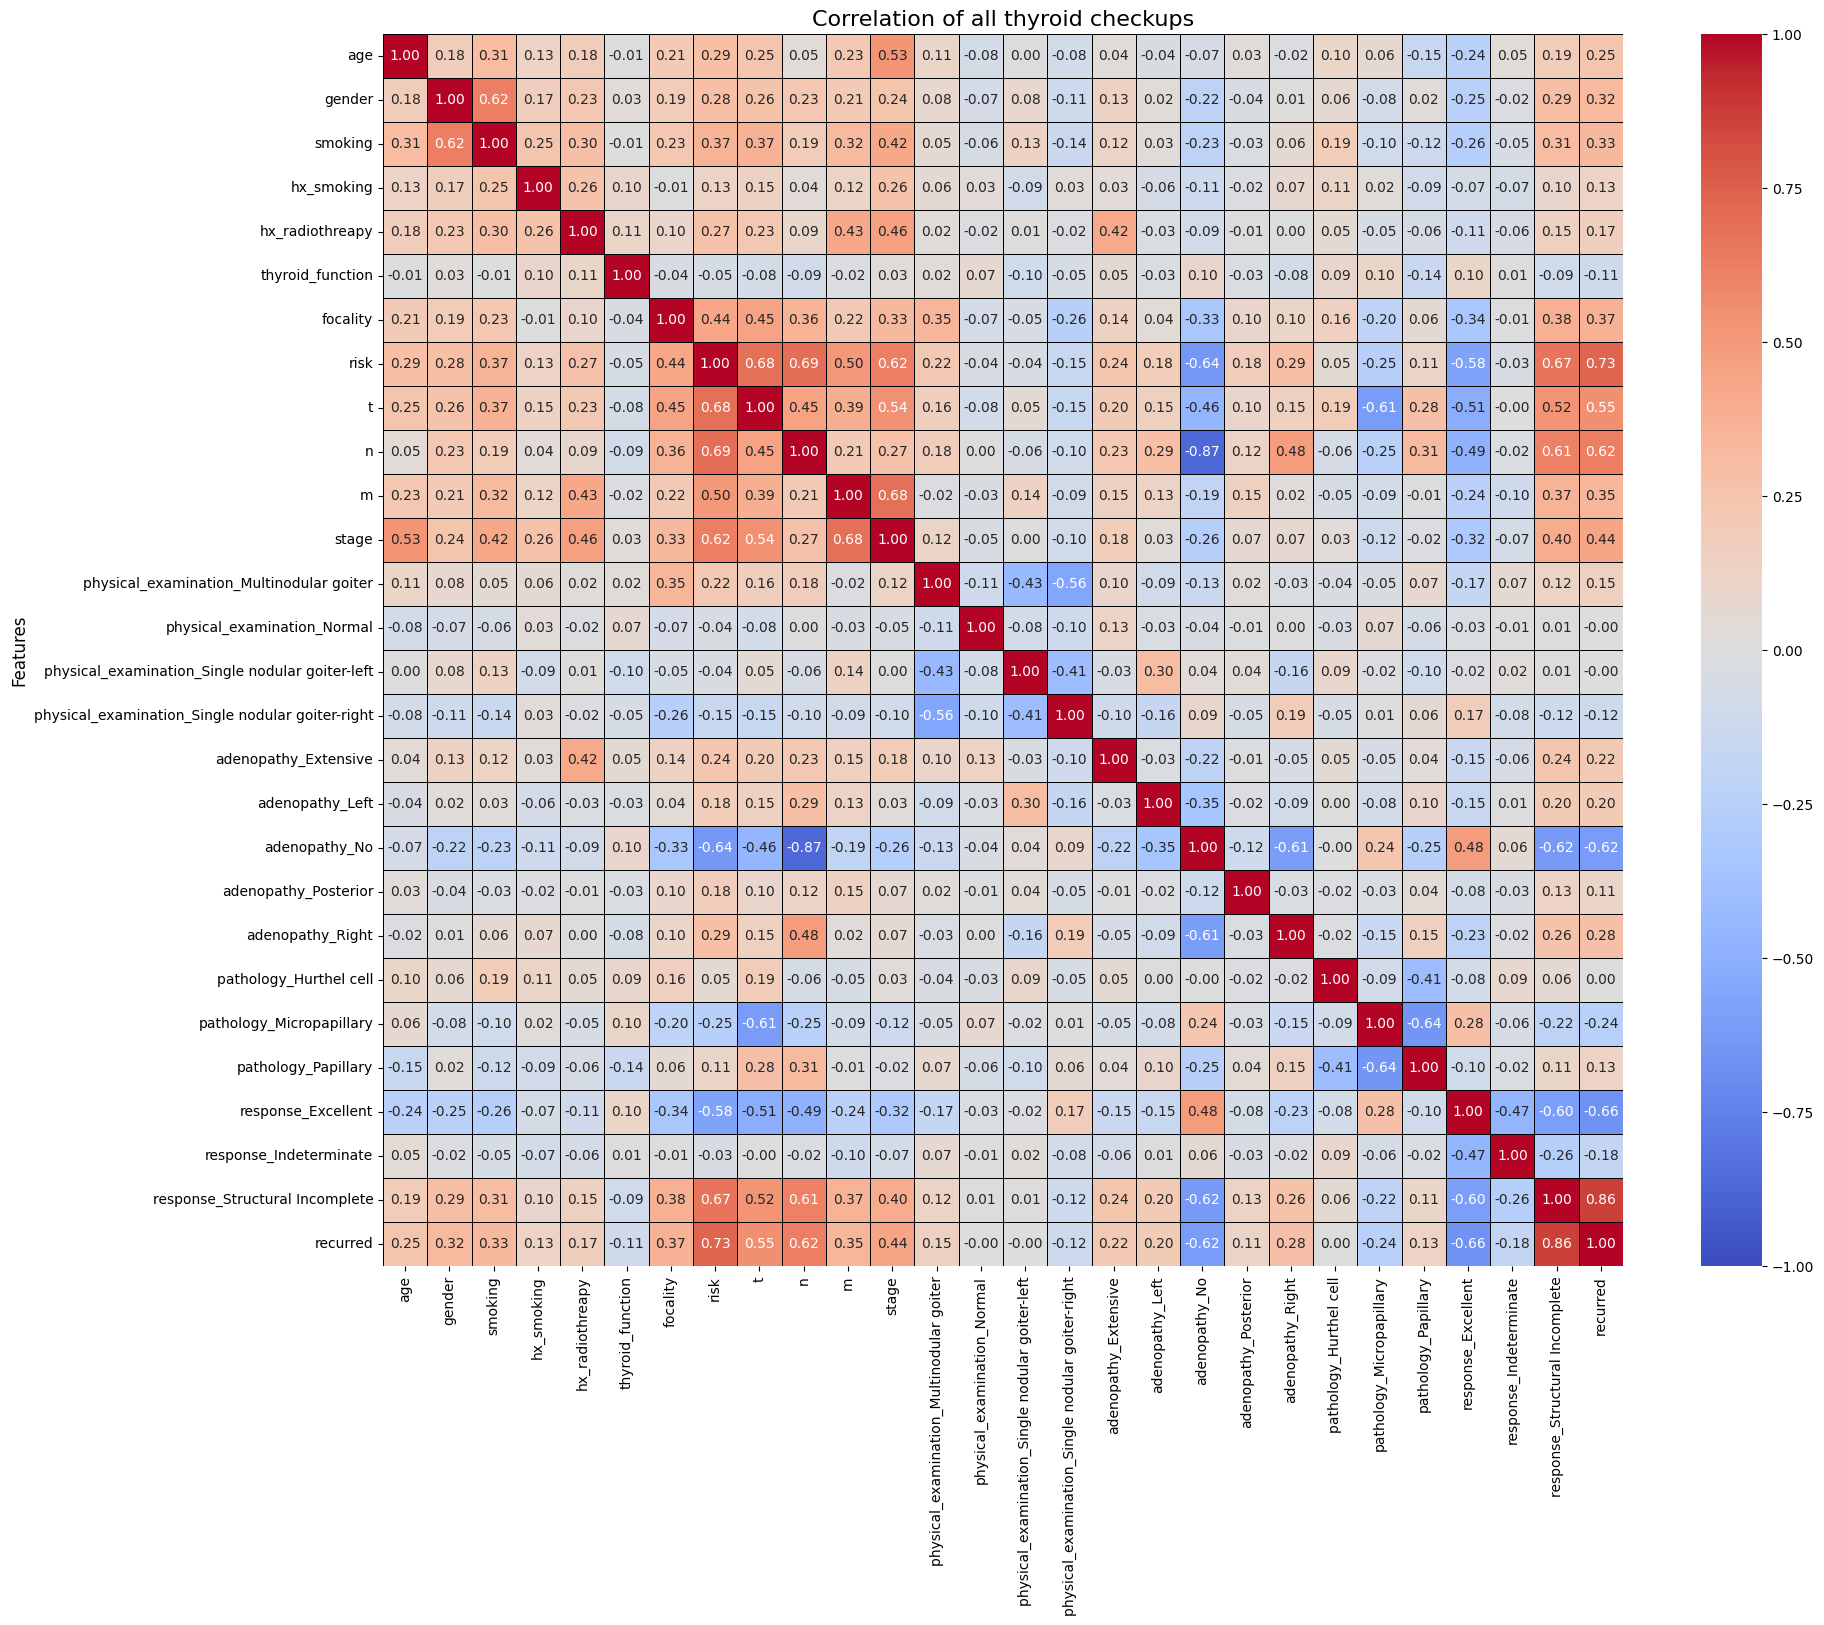

In [135]:
correlation_matrix = df_new.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Correlation of all thyroid checkups', fontsize=16)
plt.ylabel('Features', fontsize=12)

plt.show()

- 'adenopathy_No' has high negative collinearity with 'n' causing multicollinearity

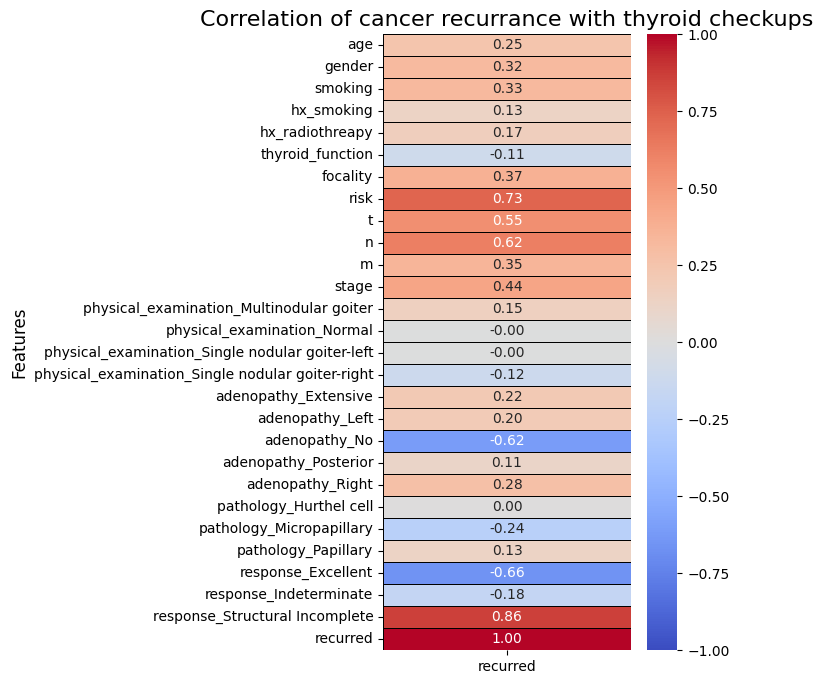

In [146]:
target_corr = correlation_matrix[['recurred']]

plt.figure(figsize=(4, 8))
sns.heatmap(target_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Correlation of cancer recurrance with thyroid checkups', fontsize=16)
plt.ylabel('Features', fontsize=12)

plt.show()

- 4 high positive correlation of cancer recurrance are with 'response_Structural Incomplete', 'risk', 'n' and 't'
- 2 high negative correlation of cancer recurrance are with 'response_Excellent' and 'adenopathy_No'
- No correlation of cancer recurrance with 'physical_examination_Normal', 'physical_examination_Single nodular goiter-left' and 'pathology_Hurthel cell' 

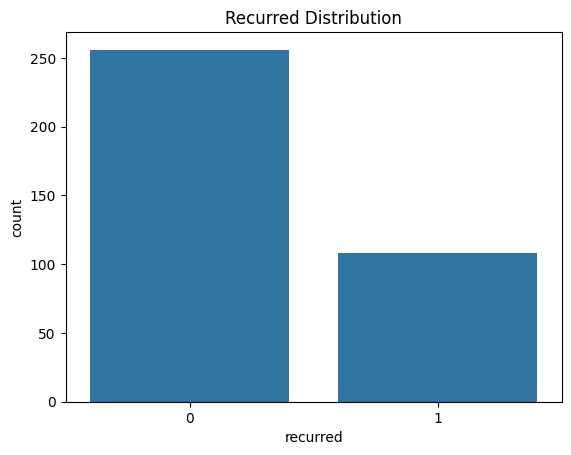

In [160]:
sns.countplot(data=df_new, x='recurred')
plt.title('Recurred Distribution')
plt.show()

- The data is imbalance, we will see into that later

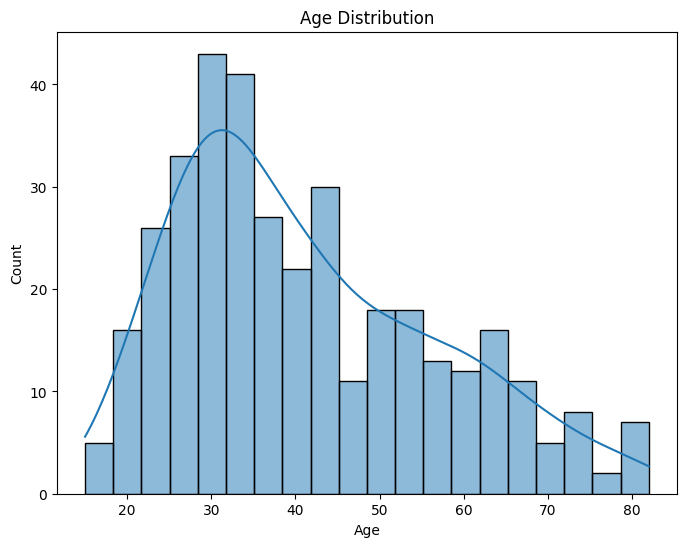

In [162]:
plt.figure(figsize=(8,6))
sns.histplot(df_new['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

- Age of most people is around 25 to 40 years

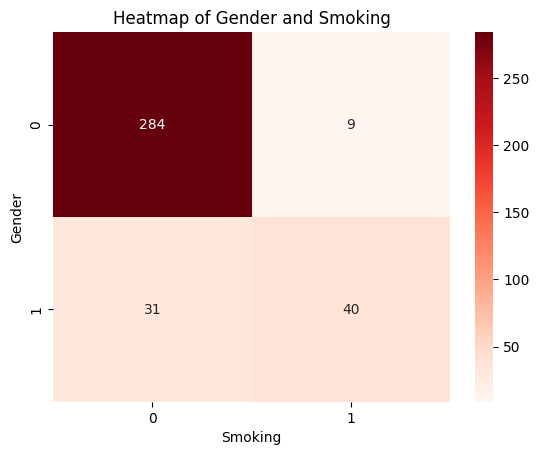

In [182]:
pivot_table = pd.crosstab(df_new['gender'], df_new['smoking'])

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title('Heatmap of Gender and Smoking')
plt.xlabel('Smoking')
plt.ylabel('Gender')
plt.show()

- We can see that men(40 out of 71) smoke more than women

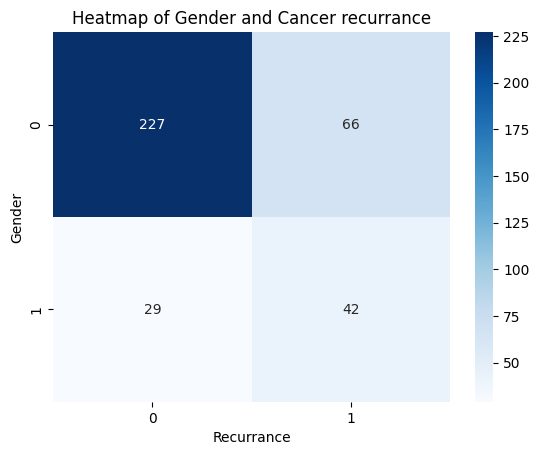

In [184]:
pivot_table = pd.crosstab(df_new['gender'], df_new['recurred'])

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Heatmap of Gender and Cancer recurrance')
plt.xlabel('Recurrance')
plt.ylabel('Gender')
plt.show()

- As per the previous heatmap of gender and smoke we saw than men percentage of smoking is higher than womens
- As in this heatmap we can see that cancer recurrance is higher in male (42 out 71)
- This might be a critical feature

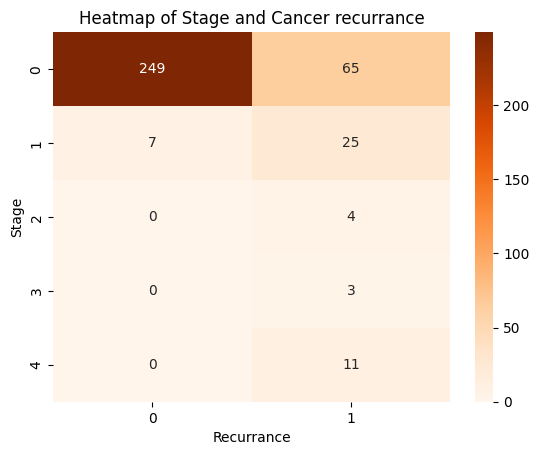

In [190]:
pivot_table = pd.crosstab(df_new['stage'], df_new['recurred'])

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('Heatmap of Stage and Cancer recurrance')
plt.xlabel('Recurrance')
plt.ylabel('Stage')
plt.show()

- It clearly show that stage 2, 3 and 4 are full causing cancer recurrance`

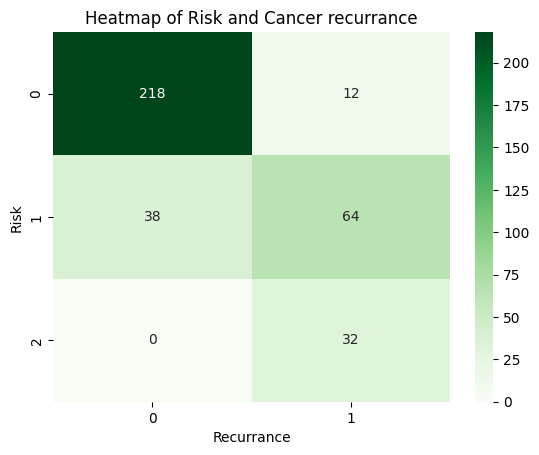

In [191]:
pivot_table = pd.crosstab(df_new['risk'], df_new['recurred'])

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Heatmap of Risk and Cancer recurrance')
plt.xlabel('Recurrance')
plt.ylabel('Risk')
plt.show()

## Visualization for numerical variables

In [195]:
df.columns.to_list()

['age',
 'gender',
 'smoking',
 'hx_smoking',
 'hx_radiothreapy',
 'thyroid_function',
 'physical_examination',
 'adenopathy',
 'pathology',
 'focality',
 'risk',
 't',
 'n',
 'm',
 'stage',
 'response',
 'recurred']

In [197]:
df_new

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,focality,risk,t,n,m,stage,physical_examination_Multinodular goiter,physical_examination_Normal,physical_examination_Single nodular goiter-left,physical_examination_Single nodular goiter-right,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary,response_Excellent,response_Indeterminate,response_Structural Incomplete,recurred
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1,34,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
3,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
4,62,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,1,1,1,1,0,0,2,6,2,1,4,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
360,81,1,1,0,1,0,1,2,6,2,1,4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
361,72,1,1,1,0,0,1,2,6,2,1,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
362,61,1,1,1,1,4,1,2,6,2,0,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [341]:
scaler = StandardScaler()
df_new['age'] = scaler.fit_transform(df_new[['age']])

In [210]:
X = df_new.drop(columns=['recurred'])
y = df_new['recurred']

In [211]:
X

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,focality,risk,t,n,m,stage,physical_examination_Multinodular goiter,physical_examination_Normal,physical_examination_Single nodular goiter-left,physical_examination_Single nodular goiter-right,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary,response_Excellent,response_Indeterminate,response_Structural Incomplete
0,-0.931780,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,-0.474064,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,-0.735616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,1.356803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,1.356803,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2.010683,1,1,1,1,0,0,2,6,2,1,4,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
360,2.599176,1,1,0,1,0,1,2,6,2,1,4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
361,2.010683,1,1,1,0,0,1,2,6,2,1,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
362,1.291414,1,1,1,1,4,1,2,6,2,0,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [212]:
y

0      0
1      0
2      0
3      0
4      0
      ..
359    1
360    1
361    1
362    1
363    1
Name: recurred, Length: 364, dtype: int64

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, )

In [51]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), num_columns),
#         ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ohe_columns),
#         ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_columns)
#     ],
#     remainder='passthrough'
# )


In [223]:
classifiers = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Support Vector Machine': SVC(class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced')
}

In [224]:
results = {}
for name, clf in classifiers.items():
    # Create pipeline with preprocessing and classifier
    pipeline = Pipeline(steps=[
        ('classifier', clf)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = {
        'Mean Accuracy': scores.mean(),
        'Std Dev Accuracy': scores.std()
    }

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Accuracy: {metrics['Mean Accuracy']:.4f}")
    print(f"  Std Dev Accuracy: {metrics['Std Dev Accuracy']:.4f}")
    print()

Random Forest:
  Mean Accuracy: 0.9606
  Std Dev Accuracy: 0.0248

Support Vector Machine:
  Mean Accuracy: 0.9528
  Std Dev Accuracy: 0.0095

K-Nearest Neighbors:
  Mean Accuracy: 0.9018
  Std Dev Accuracy: 0.0325

Logistic Regression:
  Mean Accuracy: 0.9332
  Std Dev Accuracy: 0.0264

Decision Tree:
  Mean Accuracy: 0.9290
  Std Dev Accuracy: 0.0205



In [228]:
models = {
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced'),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [5, 10, 15],
        }
    },
    'Support Vector Machine': {
        'model': SVC(class_weight='balanced'),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['poly', 'rbf', 'sigmoid'],
            'model__gamma': ['scale', 'auto', 0.001]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(class_weight='balanced'),
        'params': {
            'model__criterion': ['gini', 'entropy'],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 5]
        }
    }
}

In [229]:
for model_name, config in models.items():
    print(f"\nTraining {model_name}...")

    # Create pipeline
    pipeline = Pipeline(steps=[
        ('model', config['model'])
    ])

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, config['params'], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Training Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Random Forest Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.97      0.95      0.96        38

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110


Training Support Vector Machine...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Support Vector Machine: {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Support Vector Machine Accuracy: 0.9545
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.90      0.97      0.94        38

    accuracy        

- As we can evaluate Support vector machine and Random forest is performing better in F1 score and all aspects

- now we will cross validate and see which one is better

## Cross validating model

In [234]:
best_model = SVC(class_weight='balanced', C=1, gamma='scale', kernel='rbf')

pipeline = Pipeline(steps=[
        ('model', best_model)
    ])

best_cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
best_cv_mean_score = best_cv_scores.mean()

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("SVC Results:")
print(f"Cross-Validation Accuracy: {best_cv_mean_score:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("-" * 50)

SVC Results:
Cross-Validation Accuracy: 0.95
Test Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.90      0.97      0.94        38

    accuracy                           0.95       110
   macro avg       0.94      0.96      0.95       110
weighted avg       0.96      0.95      0.95       110

--------------------------------------------------


#### As SVC has high recall, it is crucial(cases where cancer is present but not detected) for the model
#### So i am choosing SVC model 

## Saving model

In [235]:
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

## Checking prediction

In [315]:
df

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [337]:
X_check = pd.DataFrame({'age': [67],
    'gender': ['M'],
    'smoking': ['Yes'],
    'hx_smoking': ['Yes'],
    'hx_radiothreapy': ['No'],
    'thyroid_function': ['Euthyroid'],
    'physical_examination': ['Multinodular goiter'],
    'adenopathy': ['Bilateral'],
    'pathology': ['Micropapillary'],
    'focality': ['Uni-Focal'],
    'risk': ['Low'],
    't': ['T1a'],
    'n': ['N0'],
    'm': ['M0'],
    'stage': ['IVB'],
    'response': ['Biochemical Incomplete'],
})

binary_mappings = {
    'gender': {'M': 1, 'F': 0},
    'smoking': {'Yes': 1, 'No': 0},
    'hx_smoking': {'Yes': 1, 'No': 0},
    'hx_radiothreapy': {'Yes': 1, 'No': 0},
}

for col, mapping in binary_mappings.items():
    X_check[col] = X_check[col].map(mapping)


ordinal_mappings = {
    'thyroid_function': ['Euthyroid', 'Subclinical Hypothyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Clinical Hyperthyroidism'],
    'focality': ['Uni-Focal', 'Multi-Focal'],
    'risk': ['Low', 'Intermediate', 'High'],
    't': ['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'],
    'n': ['N0', 'N1a', 'N1b'],
    'm': ['M0', 'M1'],
    'stage': ['I', 'II', 'III', 'IVA', 'IVB']
}

for column, categories in ordinal_mappings.items():
    encoder = OrdinalEncoder(categories=[categories])
    X_check[column] = encoder.fit_transform(X_check[[column]]).astype(np.int8)

X_check.reset_index(drop=True, inplace=True)

# One hot encoding
cols_to_encode = ['physical_examination', 'adenopathy', 'pathology', 'response']

encoded_features_check = ohe.transform(X_check[cols_to_encode])
df_encoded_check = pd.DataFrame(encoded_features_check, columns=ohe.get_feature_names_out(cols_to_encode))

X_check = pd.concat([X_check, df_encoded_check.astype(np.int8)], axis=1)
X_check.drop(cols_to_encode, axis=1, inplace=True)


scaler = StandardScaler()
X_check['age'] = scaler.fit_transform(X_check[['age']])

In [338]:
X_check

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,focality,risk,t,n,m,stage,physical_examination_Multinodular goiter,physical_examination_Normal,physical_examination_Single nodular goiter-left,physical_examination_Single nodular goiter-right,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary,response_Excellent,response_Indeterminate,response_Structural Incomplete
0,0.0,1,1,1,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [318]:
# scaled_data = scaler.transform(X_new)
pipeline.predict(X_check)[0]

1

In [331]:
ohe_new = joblib.load(('onehot_encoder.joblib'))

In [344]:
X_check

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,focality,risk,t,n,m,stage,physical_examination_Multinodular goiter,physical_examination_Normal,physical_examination_Single nodular goiter-left,physical_examination_Single nodular goiter-right,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary,response_Excellent,response_Indeterminate,response_Structural Incomplete
0,67.0,1,1,1,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [334]:
pipeline.predict(X_check)[0]

1